# Titanic Prediction -  Using Logistic Regression Machine Learning Algo


The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we are to build a predictive model that answers the question: "What sorts of people were more likely to survive" using passenger data (ie name, age, gender, socio-economic class, etc).


## Getting Started



To begin working with the RMS Titanic passenger data, we'll first need to import the functionality we need, and load our data into a pandas DataFrame.
Run the code cell below to load our data and display the first few entries (passengers) for examination using the .head() function.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load the data
data=pd.read_csv('titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

    Survived: CATEGORICAL: Outcome of survival (0 = No; 1 = Yes)
    Pclass: CATEGORICAL: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
    Name: CATEGORICAL-> NORMINAL :Name of passenger
    Sex: CATEGORICAL:Sex of the passenger
    Age: NUMERICAL CONTINUOUS: Age of the passenger (Some entries contain NaN)
    SibSp: CATEGORICAL Number of siblings and spouses of the passenger aboard
    Parch: CATEGORICAL Number of parents and children of the passenger aboard
    Ticket: CATEGORICAL Ticket number of the passenger
    Fare: NUMERICAL CONTINUOUS: Fare paid by the passenger
    Cabin Cabin number of the passenger (Some entries contain NaN)
    Embarked: CATEGORICAL-> NORMINAL: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the Survived feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.
Run the code cell below to remove Survived as a feature of the dataset and store it in outcomes.


# Exploratory Data Analysis

<strong>PROBLEM:</strong> To predict whether is a particular person survived based on the information provided in the test dataset.

In [10]:
## sum of null values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this missing value check, we realised that there are missing value in 3 features in the dataframe
* Age has -> 177
* Cabin has -> 687
**Embarked has ->2

all missing values

In [89]:
#Filling null values in Training dataset


data['Age'].fillna(data['Age'].mean(),inplace=True)

data['Cabin'].fillna(data['Cabin'].mode().values[0],inplace=True)

data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)

In [90]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<strong>What Datatypes are there in the dataframe?</strong>

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it. Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).


In [24]:
# Datatypes in the dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring each of these features

We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


FEATURE 1: Survived

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survive

<strong>*This is the variable we want our ML model to predict based off the others.*</strong>

0    549
1    342
Name: Survived, dtype: int64


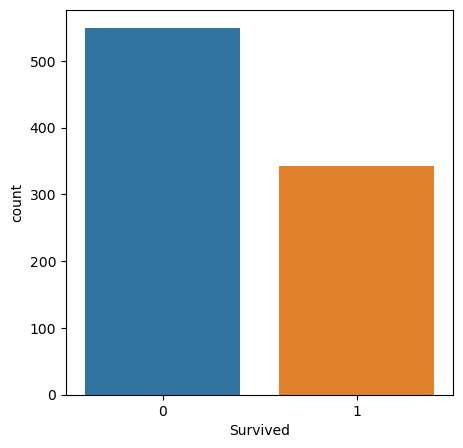

In [26]:
# How many people has survived the titanic?
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=data)             #--> You can use this to get a vertical graph.
 
print(data['Survived'].value_counts())             ##This will help us see the exact number along with the graph.



So here we can see that the people who survived (342) are far less than the ones who did'nt (549). Thus, in the future when we run our test dataset and we get that the number of people who survived is more then that means that there something wrong.

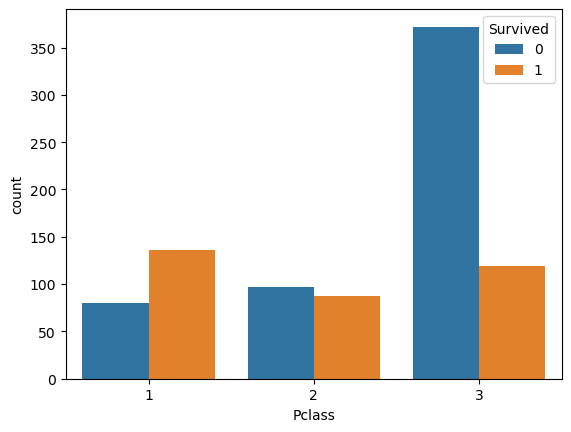

In [27]:
## Bivariate Analysis

sns.countplot(x='Pclass',hue='Survived',data=data)
plt.show()


FEATURE 2: Name

Description: The name of the passenger.


In [28]:
# How many different names are there?
data['Name'].value_counts()[:15]      #--> This can be used to view the different types of names (here we are taking the first 15).

Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Van Impe, Mr. Jean Baptiste                        1
Leitch, Miss. Jessie Wills                         1
Johnson, Mr. Alfred                                1
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")       1
Taussig, Miss. Ruth                                1
Name: Name, dtype: int64

Every row has a unique name. This is similar to the passenger ID.

<strong>Note:</strong> Because of so many different names we won't be using the name variable



FEATURE 3: Gender

Description: The gender of the passenger (male or female).


male      577
female    314
Name: Gender, dtype: int64


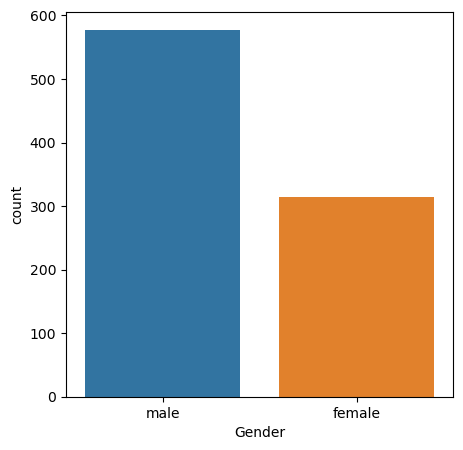

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=data)
print(data['Gender'].value_counts())




FEATURE 4: Age

Description: The age of each passenger.



<AxesSubplot:xlabel='Age', ylabel='Count'>

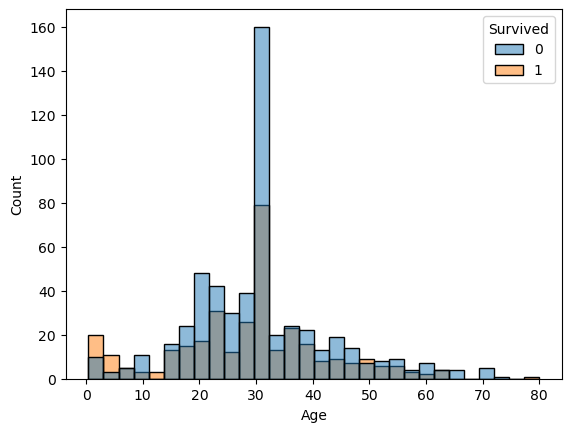

In [83]:
sns.histplot(x='Age',hue='Survived',data=data)


FEATURE 5: SibSp

Description: The number of siblings or spouses aboard the Titanic.


In [32]:
# What values are present?
data['SibSp'].value_counts()



0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We can see that most of the passengers on board the Titanic didn't have any spouse or sibling with them.


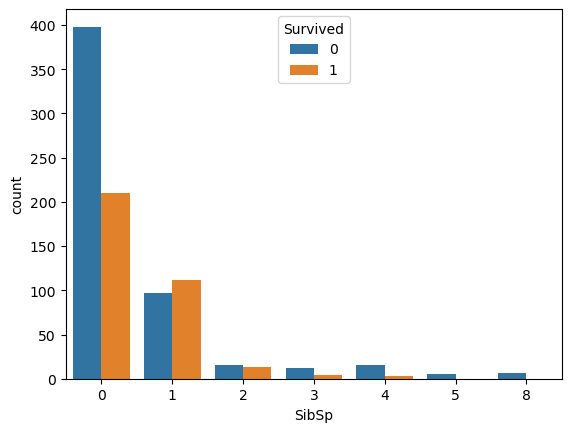

In [33]:
sns.countplot(x='SibSp',hue='Survived',data=data)
plt.show()

But the passengers with one sibling or spouse has a higher chance of survival. This can be because if you had a wife onboard, your chances of survival can be high.


FEATURE 6: Parch

Description: The number of parents or children on board the Titanic.

    Since this is similar to SibSp, we will do a similar analysis.



In [35]:
# What values are present?
data['Parch'].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

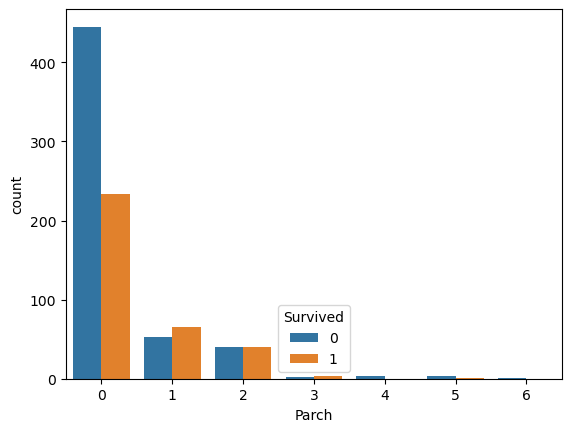

In [36]:
sns.countplot(x='Parch',hue='Survived',data=data)
plt.show()

But the passengers with one parent or child has a higher chance of survival. This can be because if you had a wife onboard, your chances of survival can be high.

FEATURE 7: Fare

Description: The cost of each ticket.


<AxesSubplot:xlabel='Fare', ylabel='Count'>

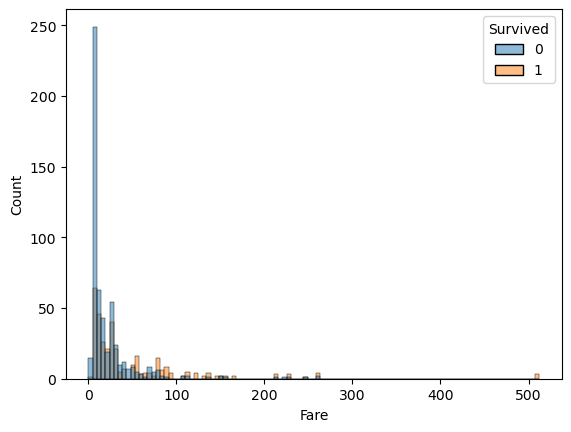

In [84]:
sns.histplot(x='Fare',hue='Survived',data=data)


FEATURE 8: Embarked

Description: The port where each passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton


In [86]:
# What are the different values in Embarked?
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Embarked it a categorical variable because there are 3 categories from which a passenger could have boarded.


In [41]:
data_select = pd.DataFrame() #

<AxesSubplot:xlabel='Embarked', ylabel='count'>

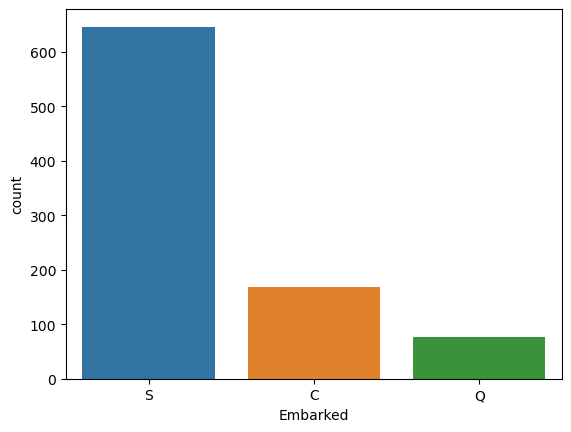

In [88]:
# Viewing the counts
sns.countplot(x= 'Embarked', data= data)



In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
data_select['PassengerId'] = data['PassengerId']
data_select['Pclass'] = data['Pclass']
data_select['Gender'] = data['Gender']
data_select['Age'] = data['Age']
data_select['SibSp'] = data['SibSp']
data_select['Parch'] = data['Parch']
data_select['Fare'] = data['Fare']
data_select['Cabin'] = data['Cabin']
data_select['Embarked'] = data['Embarked']
data_select['Survived'] = data['Survived']

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [46]:
data_select

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,male,22.000000,1,0,7.2500,B96 B98,S,0
1,2,1,female,38.000000,1,0,71.2833,C85,C,1
2,3,3,female,26.000000,0,0,7.9250,B96 B98,S,1
3,4,1,female,35.000000,1,0,53.1000,C123,S,1
4,5,3,male,35.000000,0,0,8.0500,B96 B98,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,13.0000,B96 B98,S,0
887,888,1,female,19.000000,0,0,30.0000,B42,S,1
888,889,3,female,29.699118,1,2,23.4500,B96 B98,S,0
889,890,1,male,26.000000,0,0,30.0000,C148,C,1


###  Feature Encoding

Now since our some categorical data, we can feature encode them so that they are ready for our machine learning models.



In [47]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [49]:

# fit the encoder to the data
label_encoder.fit(data_select['Gender'])
# transform the data
encoded_data = label_encoder.transform(data_select['Gender'])

print(encoded_data)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [50]:
data_select['Gender'] = encoded_data

In [51]:
data_select

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,1,22.000000,1,0,7.2500,B96 B98,S,0
1,2,1,0,38.000000,1,0,71.2833,C85,C,1
2,3,3,0,26.000000,0,0,7.9250,B96 B98,S,1
3,4,1,0,35.000000,1,0,53.1000,C123,S,1
4,5,3,1,35.000000,0,0,8.0500,B96 B98,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,B96 B98,S,0
887,888,1,0,19.000000,0,0,30.0000,B42,S,1
888,889,3,0,29.699118,1,2,23.4500,B96 B98,S,0
889,890,1,1,26.000000,0,0,30.0000,C148,C,1


In [52]:
# fit the encoder to the data
label_encoder.fit(data_select['Cabin'])
# transform the data
cabin_data = label_encoder.transform(data_select['Cabin'])

print(cabin_data)

[ 47  81  47  55  47  47 129  47  47  47 145  49  47  47  47  47  47  47
  47  47  47 111  47  13  47  47  47  63  47  47  47  41  47  47  47  47
  47  47  47  47  47  47  47  47  47  47  47  47  47  47  47  47 101  47
  23  71  47  47  47  47  47  21  80  47  47  47 142  47  47  47  47  47
  47  47  47 140  47  47  47  47  47  47  47  47  47  47  47  47  63  47
  47  47 122  47  47  47  12  91  47  47  47  47  98  47  47  47  47  47
  47  47  52  47  47  47  47  47  47  47  36  47  47  47  47 116  98  47
  47  47 138  47  47  47  47  47  47  47 107  55  47  45  47  47  47  47
  47  47  47  47 141  47  47  61  47  47  47  47  47  47  47  47  47  47
  47  47  47  47 123  47  47  47  18  47  47  47  14  47  47  69  47  47
  47  47  47 144  47   9  47  47  47  47  47  47  47 141  28  43  47  47
  47  47  47  47  47  47  47 145  47  47  47   8  47  47  47  47  47 103
  47  47  93  47  47  47  47  47  87  47  47  47  47  47  80  47  47  47
  47  47  47  47  47  47  47  47  47  47  47  78  4

In [53]:
# fit the encoder to the data
label_encoder.fit(data_select['Embarked'])
# transform the data
embark_data = label_encoder.transform(data_select['Embarked'])

print(embark_data)

[2 0 2 2 2 1 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0
 2 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2
 0 2 2 0 2 1 2 0 2 2 2 0 2 2 0 1 2 0 2 0 2 2 2 2 0 2 2 2 0 0 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 0 2 2 2
 2 1 2 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 1 0 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 0
 2 1 2 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 0 2 2 2 1 2 0 0 2 2 0
 0 2 2 0 1 1 2 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 2 2 0 1 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 1 1 2 0 0 2 1 2 0 0 1 0
 0 2 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 

In [54]:
data_select['Cabin'] = cabin_data
data_select['Embarked'] = embark_data

In [55]:
data_select.head()

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,47,2,0
1,2,1,0,38.0,1,0,71.2833,81,0,1
2,3,3,0,26.0,0,0,7.9250,47,2,1
3,4,1,0,35.0,1,0,53.1000,55,2,1
4,5,3,1,35.0,0,0,8.0500,47,2,0


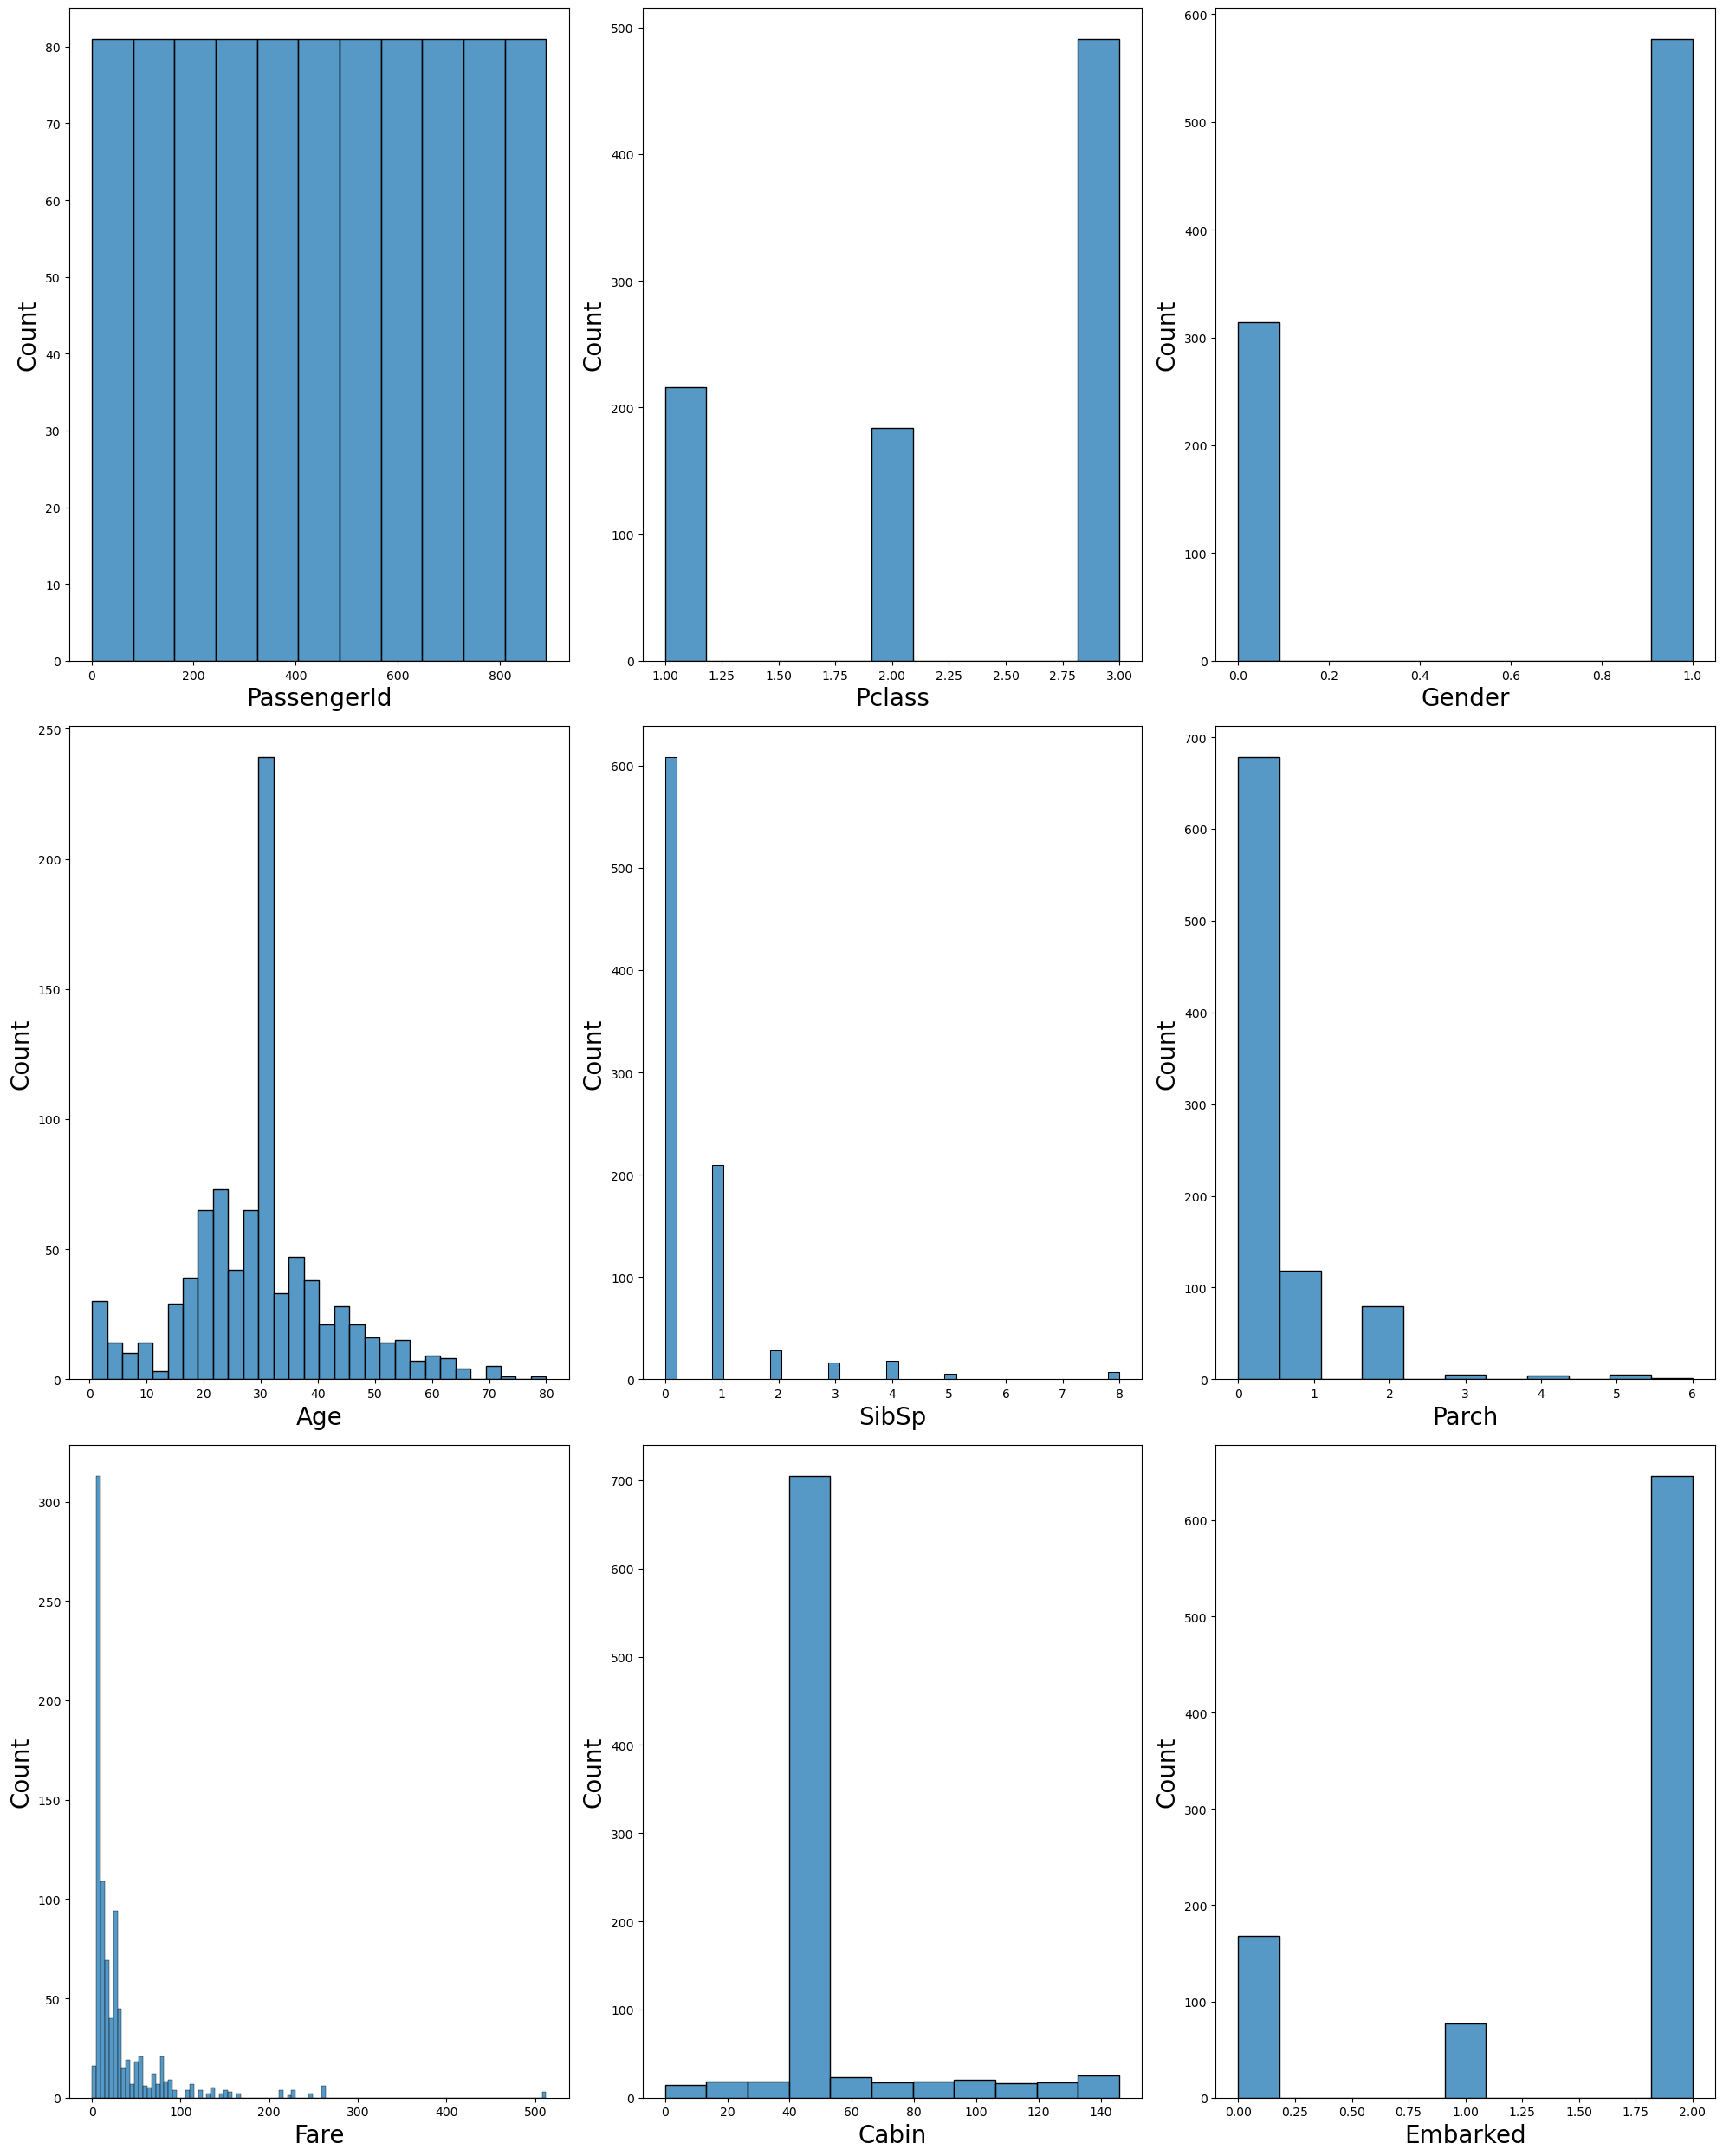

In [57]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_select:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data_select[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [60]:
data_select.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Gender,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292
Cabin,891.0,53.639731,23.568293,0.00,47.0000,47.000000,47.0,146.0000
Embarked,891.0,1.536476,0.791503,0.00,1.0000,2.000000,2.0,2.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000


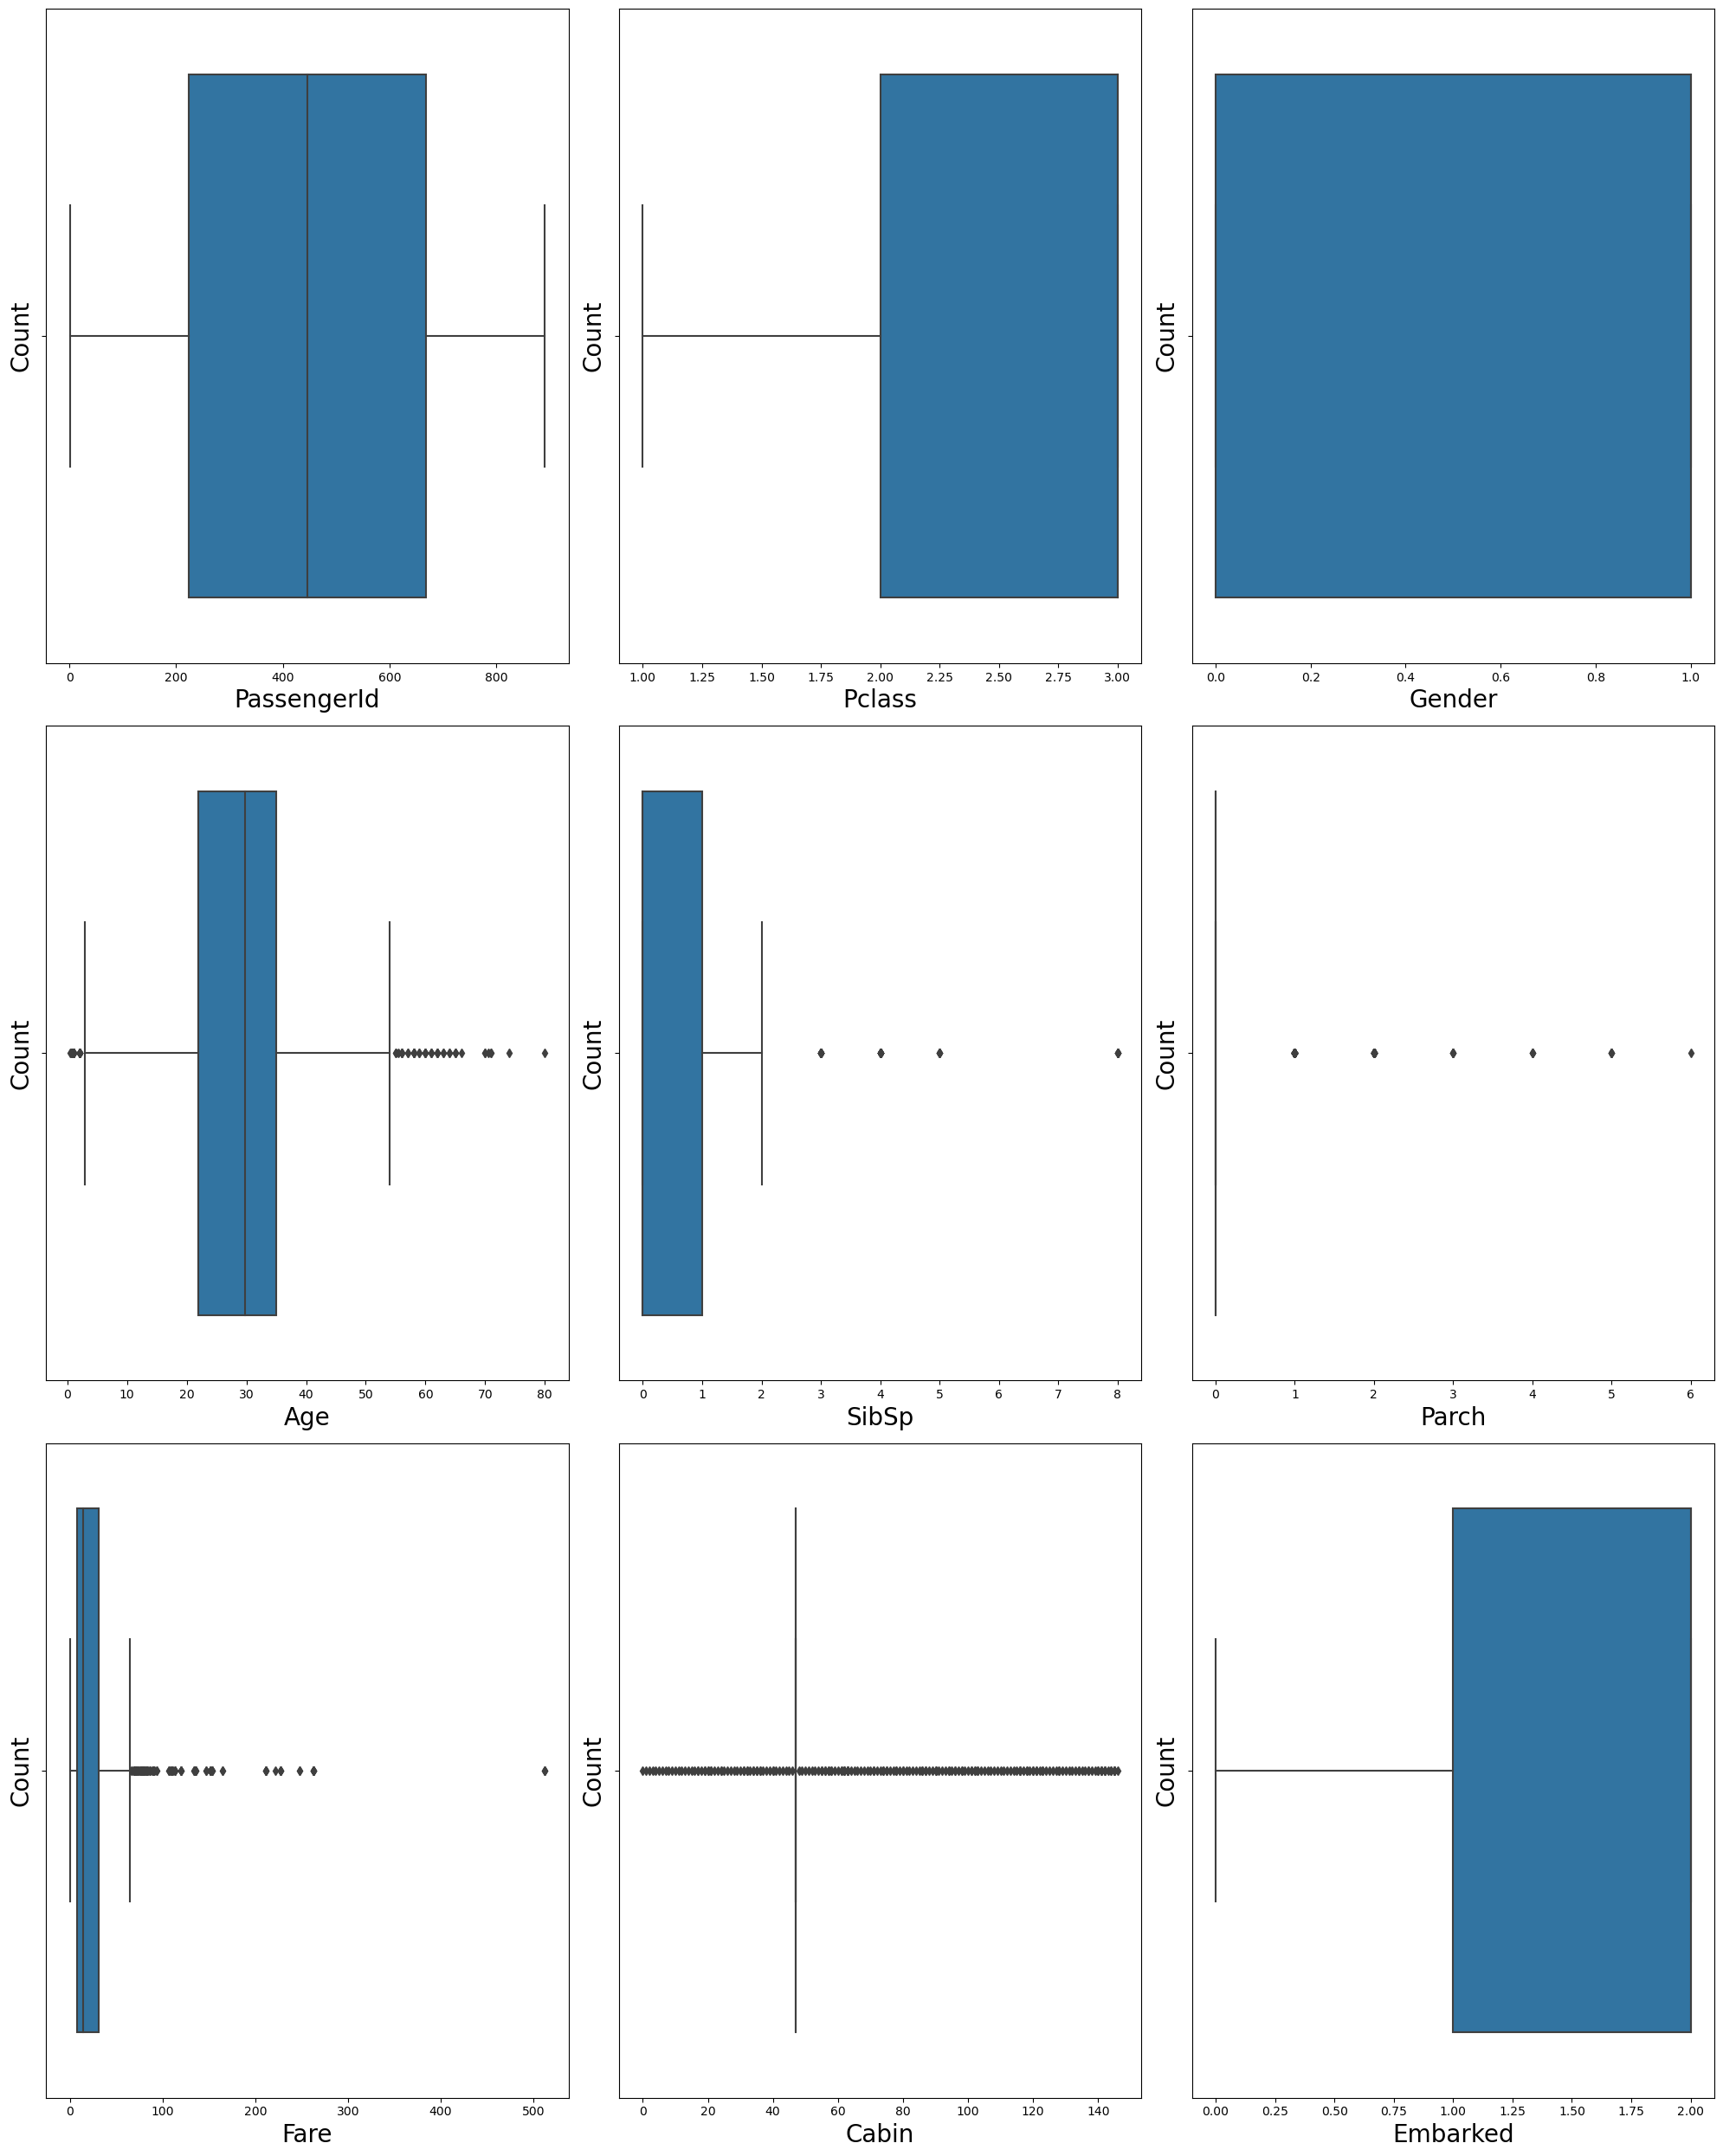

In [61]:
import warnings
warnings.filterwarnings("ignore")

## Step 4:-Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data_select:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data_select[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

there are outliers in SibSp and Fare

In [63]:
## Step 1 Creating independent and dependent variable.

X=data_select.iloc[:,:-1]
y=data_select.Survived

In [64]:
X

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.000000,1,0,7.2500,47,2
1,2,1,0,38.000000,1,0,71.2833,81,0
2,3,3,0,26.000000,0,0,7.9250,47,2
3,4,1,0,35.000000,1,0,53.1000,55,2
4,5,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,47,2
887,888,1,0,19.000000,0,0,30.0000,30,2
888,889,3,0,29.699118,1,2,23.4500,47,2
889,890,1,1,26.000000,0,0,30.0000,60,0


In [65]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [66]:
## Step 2 Creating training and testing data. the popose of slitng is for evalution
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [67]:
y_test.shape

(268,)

In [68]:
## Step 3 Model creation
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

clf.fit(X_train,y_train)  ## training

LogisticRegression()

In [69]:
## Step 4 Prediction
y_pred=clf.predict(X_test)

In [70]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1])

In [71]:
y_pred_prob=clf.predict_proba(X_test)

In [72]:
y_pred_prob

array([[0.56787849, 0.43212151],
       [0.90892149, 0.09107851],
       [0.32636341, 0.67363659],
       [0.78509577, 0.21490423],
       [0.4861753 , 0.5138247 ],
       [0.05275856, 0.94724144],
       [0.8686943 , 0.1313057 ],
       [0.84572393, 0.15427607],
       [0.88008019, 0.11991981],
       [0.87318951, 0.12681049],
       [0.80664317, 0.19335683],
       [0.80653158, 0.19346842],
       [0.84725391, 0.15274609],
       [0.27587604, 0.72412396],
       [0.83398647, 0.16601353],
       [0.85813074, 0.14186926],
       [0.8504748 , 0.1495252 ],
       [0.83478113, 0.16521887],
       [0.35538867, 0.64461133],
       [0.40052348, 0.59947652],
       [0.85701133, 0.14298867],
       [0.86427822, 0.13572178],
       [0.79019423, 0.20980577],
       [0.11496409, 0.88503591],
       [0.33680338, 0.66319662],
       [0.73136688, 0.26863312],
       [0.80887333, 0.19112667],
       [0.85996589, 0.14003411],
       [0.84738265, 0.15261735],
       [0.83029924, 0.16970076],
       [0.

In [73]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

## confusion matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

<img src="cm.png" width="500">

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

In [75]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[147  31]
 [ 18  72]]



	__True Positive(TP):__  72

	__True Negative(TN):__ 147

	__False Positive(FP):__ 31

	__False Negative(FN):__ 18
    
so therefore we have 49 mixed classifiers in the model

In [76]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Survived,,
0,147,31
1,18,72


In [77]:
Acc = accuracy_score(y_test,y_pred)
Acc

0.8171641791044776

In [78]:
recall=recall_score(y_test,y_pred)
recall

0.8

In [79]:
precision=precision_score(y_test,y_pred)
precision

0.6990291262135923

In [80]:
f1score=f1_score(y_test,y_pred)
f1score

0.7461139896373058

In [81]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       178
           1       0.70      0.80      0.75        90

    accuracy                           0.82       268
   macro avg       0.79      0.81      0.80       268
weighted avg       0.83      0.82      0.82       268



In [82]:
y_test.value_counts()

0    178
1     90
Name: Survived, dtype: int64